### Adversarial Detection using FeatureSqueezing and MagNet

In this notebook, we'll explore adversarial detection using FeatureSqueezing and MagNet. This code has been adapted from [the EvadeML repository](https://github.com/mzweilin/EvadeML-Zoo) with changes to enable it to run properly with Python3 and Jupyter notebooks.

To run locally, I recommend following the latest instructions on the EvadeML repository and the [MagNet repository](https://github.com/Trevillie/MagNet).

In [1]:
%matplotlib inline

In [2]:
cd ../EvadeML-Zoo

/home/katharine/wrrk/my_classes/oreilly/oreilly-live-data-security/EvadeML-Zoo


In [3]:
from main import main

Using TensorFlow backend.


In [4]:
main(dataset_name="MNIST", 
     model_name="cleverhans", 
     detection="MagNet",
     attacks="FGSM?eps=0.1;BIM?eps=0.1&eps_iter=0.02;JSMA?targeted=next"
)

Located Cleverhans
Located Carlini_nn_robust_attacks
Located Keras-deep-learning-models
Located MobileNets
Located Deepfool/Universal
Located DenseNet
Located MagNet
Flags are {'dataset_name': <absl.flags._flag.Flag object at 0x7f3e87b9cf60>, 'model_name': <absl.flags._flag.Flag object at 0x7f3e87ba5668>, 'select': <absl.flags._flag.BooleanFlag object at 0x7f3e87ba56a0>, 'nb_examples': <absl.flags._flag.Flag object at 0x7f3e700db5f8>, 'balance_sampling': <absl.flags._flag.BooleanFlag object at 0x7f3e6ffb1940>, 'test_mode': <absl.flags._flag.BooleanFlag object at 0x7f3e6ff4deb8>, 'attacks': <absl.flags._flag.Flag object at 0x7f3e6ff4df60>, 'clip': <absl.flags._flag.Flag object at 0x7f3e6ff5d048>, 'visualize': <absl.flags._flag.BooleanFlag object at 0x7f3e6ff5d080>, 'robustness': <absl.flags._flag.Flag object at 0x7f3e6ff5d160>, 'detection': <absl.flags._flag.Flag object at 0x7f3e6ff5d208>, 'detection_train_test_mode': <absl.flags._flag.BooleanFlag object at 0x7f3e6ff5d278>, 'result_fold

/home/katharine/.virtualenvs/py3data/lib/python3.6/site-packages/keras/engine/saving.py:305: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '



Running attack: fgsm {'eps': 0.1}
Loading adversarial examples from [MNIST_100_1d1b8_cleverhans_fgsm?eps=0.1.pickle].

---Attack (uint8): fgsm?eps=0.1
Success rate: 47.00%, Mean confidence of SAEs: 89.34%
### Statistics of the SAEs:
L2 dist: 2.3967, Li dist: 0.1020, L0 dist_value: 73.6%, L0 dist_pixel: 73.6%

Running attack: bim {'eps': 0.1, 'eps_iter': 0.02}
Loading adversarial examples from [MNIST_100_1d1b8_cleverhans_bim?eps=0.1&eps_iter=0.02.pickle].

---Attack (uint8): bim?eps=0.1&eps_iter=0.02
Success rate: 63.00%, Mean confidence of SAEs: 93.17%
### Statistics of the SAEs:
L2 dist: 2.0620, Li dist: 0.1020, L0 dist_value: 61.3%, L0 dist_pixel: 61.3%

Running attack: jsma {'targeted': 'next'}
targeted value: next
Loading adversarial examples from [MNIST_100_1d1b8_cleverhans_jsma?targeted=next.pickle].

---Attack (uint8): jsma?targeted=next
Success rate: 8.00%, Mean confidence of SAEs: 33.66%
### Statistics of the SAEs:
L2 dist: 5.0171, Li dist: 1.0000, L0 dist_value: 3.5%, L0 dis

/home/katharine/.virtualenvs/py3data/lib/python3.6/site-packages/keras/engine/saving.py:305: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '



Drop Rate: {'I': 0.001, 'II': 0.001}
Thresholds: {'I': 0.005937795, 'II': 0.01469338}
detector_breakdown {'I': 170, 'II': 156}
Detector: MagNet
Accuracy: 0.983333	TPR: 0.975000	FPR: 0.007143	ROC-AUC: 0.983929
detector_breakdown {'I': 1, 'II': 0}
0 undetected images
Detection rate on SAEs: 1.0000 	  25/ 25 	 fgsm?eps=0.1
detector_breakdown {'I': 24, 'II': 0}
0 undetected images
Detection rate on SAEs: 1.0000 	  34/ 34 	 bim?eps=0.1&eps_iter=0.02
detector_breakdown {'I': 0, 'II': 0}
0 undetected images
Detection rate on SAEs: 1.0000 	   4/  4 	 jsma?targeted=next
Overall detection rate on SAEs: 1.000000 (63/63)
### Excluding FAEs:
detector_breakdown {'I': 164, 'II': 140}
Overall TPR: 1.000000	ROC-AUC: 0.996429
detector_breakdown {'I': 6, 'II': 16}
Overall detection rate on FAEs: 0.9588 	  93/ 97


### Let's check out the adversarial examples generated

Attack results/MNIST_100_1d1b8_cleverhans/MNIST_100_1d1b8_cleverhans_attacks_07450_examples.png


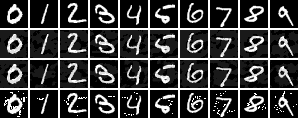

Attack results/MNIST_100_1d1b8_cleverhans/MNIST_100_1d1b8_cleverhans_attacks_97670_examples.png


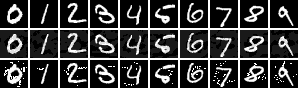

In [5]:
from IPython.display import Image 
from glob import glob

for img in glob('results/MNIST_100_1d1b8_cleverhans/MNIST_100*.png'):
    print("Attack", img)
    display(Image(filename=img))

#### Your Turn:
- How does FeatureSqueezing compare as a detection mechanism? To use the FeatureSqueezing, you will need to add proper parameters. Run the below cell for a few examples.
- Try a different attack or detection (to see all options, use `main(show_help=True)`).
- Try setting different parameters for the cleverhans attack above.
- Are your new attacks more successful? Why or why not?

In [ ]:
!cat Reproduce_FeatureSqueezing.md | grep FeatureSqueezing

In [ ]:
# %load ../solutions/feature_squeezing_detection.py
main(dataset_name="MNIST", 
     model_name="cleverhans", 
     detection="FeatureSqueezing?squeezers=bit_depth_5,median_filter_2_2&distance_measure=l1&fpr=0.05",
     attacks="FGSM?eps=0.1;BIM?eps=0.1&eps_iter=0.02;JSMA?targeted=next"
     )


### And let's take a look at what attacks were not detected!

In [6]:
from IPython.display import Image 
from glob import glob

for img in glob('results/MNIST_100_1d1b8_cleverhans/undetected_attacks_*'):
    print(img)
    display(Image(filename=img))

results/MNIST_100_1d1b8_cleverhans/undetected_attacks__FeatureSqueezing?squeezers=bit_depth_5,median_filter_2_2&distance_measure=l1&fpr=0.05__bim?eps=0.1&eps_iter=0.02.png


results/MNIST_100_1d1b8_cleverhans/undetected_attacks__FeatureSqueezing?squeezers=bit_depth_5,median_filter_2_2&distance_measure=l1&fpr=0.05__fgsm?eps=0.1.png


In [ ]:
main(dataset_name="CIFAR-10", 
     model_name="carlini", 
     attacks="fgsm?eps=0.0156;bim?eps=0.008&eps_iter=0.0012;deepfool?overshoot=10;carlinil2?targeted=next&batch_size=100&max_iterations=1000&confidence=5;carlinil2?targeted=ll&batch_size=100&max_iterations=1000&confidence=5;carlinil0?targeted=next&confidence=5;carlinil0?targeted=ll&confidence=5;jsma?targeted=next;jsma?targeted=ll;",
     detection="FeatureSqueezing?squeezers=bit_depth_5,median_filter_2_2,non_local_means_color_13_3_2&distance_measure=l1&threshold=1.7547;MagNet"
)

In [ ]:
from IPython.display import Image 
from glob import glob

for img in glob('results/CIFAR*/undetected_attacks_*'):
    print(img)
    display(Image(filename=img))

### Questions for Discussion

- Why might this example have gone undetected?
- Out of the adversarial images, which can you identify? 
- As we can see from the detection rate, this works fairly well with MNIST; but it works much less well for color images, why might that be?